# ÌïôÏäµ ÎÇ¥Ïö©
 - 2.1 Pytorch MNIST - CNN(Dropout, Batch Normalization, Check Point Save, Early Stopping)
 - 2.2 Pytorch MNIST - ÎÇòÎßåÏùò Î™®Îç∏ ÎßåÎì§Í∏∞ by CNN

# 2.1 Pytorch MNIST - CNN
# Dropout, Batch Normalization, Check Point Save, Early Stopping
- Ïù¥Î≤à Ïã§ÏäµÏóêÏÑúÎäî CNN(Convolutional Nueral Network)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂ÑÎ•òÌïòÎèÑÎ°ù ÌïôÏäµÏãúÌÇ®Îã§
- Data AugmentationÏùÑ ÌÜµÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º Ï¶ùÍ∞ïÌïòÏó¨ Î™®Îç∏Ïùò Î∂ÑÎ•ò ÏÑ±Îä•ÏùÑ Ìñ•ÏÉÅÏãúÌÇ®Îã§
- OverfittingÏùÑ Î∞©ÏßÄÌïòÎäî Dropout Í∏∞Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏Ïùò ÌïôÏäµÏÑ±Îä•ÏùÑ Í∞úÏÑ†ÌïúÎã§
- Batch NormalizationÏóê ÎåÄÌïòÏó¨ ÌïôÏäµÌïúÎã§
- Ï§ëÍ∞Ñ Ï†ÄÏû• Í∏∞Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌïôÏäµ ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÏùÄ Î™®Îç∏Ïù¥ ÏûêÎèô Ï†ÄÏû•ÎêòÎäîÍ≤ÉÏùÑ ÌôïÏù∏Ìï¥Î≥∏Îã§
- Early Stopping Í∏∞Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Over FittingÏùÑ Î∞©ÏßÄÌïúÎã§

## 2.1.1 PyTorch GPU Íµ¨Îèô Í∞ÄÎä• Ïó¨Î∂Ä ÌôïÏù∏ÌïòÍ∏∞
- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨Ïò®Îã§
- PytorchÎ•º GPUÎ°ú Íµ¨ÎèôÌï†Ïàò ÏûàÎäî Ï°∞Í±¥Ïù∏ÏßÄÎ•º ÌôïÏù∏ÌïúÎã§
- Í≤∞Í≥ºÍ∞Ä CPUÎ°ú ÎÇòÏò§Î©¥, Í∞ÄÏÉÅÌôòÍ≤ΩÏùÑ ÏßÄÏö∞Í≥† Îã§Ïãú ÍπîÏïÑÏïº ÌïúÎã§ (Pytorch, Keras Í∞ÄÏÉÅÌôòÍ≤Ω ÎßåÎìúÎäîÎ≤ï.pptx Ï∞∏Ï°∞)

In [1]:
import torch
if torch.cuda.is_available() == True:
    device = 'cuda:0'
    print('ÌòÑÏû¨ Í∞ÄÏÉÅÌôòÍ≤Ω GPU ÏÇ¨Ïö© Í∞ÄÎä•ÏÉÅÌÉú')
else:
    device = 'cpu'
    print('GPU ÏÇ¨Ïö© Î∂àÍ∞ÄÎä• ÏÉÅÌÉú')

GPU ÏÇ¨Ïö© Î∂àÍ∞ÄÎä• ÏÉÅÌÉú


- ÍµêÏú° ÌôòÍ≤ΩÏóêÏÑúÏùò seed Í≥†Ï†ï(randomÏÑ±ÏùÑ Í≥†Ï†ïÏãúÌÇ¥)

In [2]:
def seed(seed = 1234):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed() # ÏãúÎìú Í≥†Ï†ï

## 2.1.2 ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
- Î™®Îç∏ Íµ¨ÎèôÏóê ÌïÑÏöîÌïú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Îì§ÏùÑ ÏÑ§Ï†ïÌïúÎã§.
- ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ïÍ∞íÏóê Îî∞ÎùºÏÑú Î™®Îç∏Ïùò Íµ¨Îèô ÏÜçÎèÑ, Ï†ïÌôïÎèÑ, ÌïôÏäµ ÏÜçÎèÑÍ∞Ä Îã¨ÎùºÏßÑÎã§.

In [3]:
# Data Load
batch_size = 128

# Learning
maximum_epoch = 10
learning_rate = 0.01

## 2.1.3 Îç∞Ïù¥ÌÑ∞ Î°úÎìú & Ï†ÑÏ≤òÎ¶¨
- MNIST Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î°úÎìú Î∞õÎäîÎã§.
- Train, Validation, test Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÌï†Ìï¥Ï§ÄÎã§.

In [4]:
# Image Net Ï∂îÏ≤ú ÌèâÍ∑† & ÌëúÏ§ÄÌé∏Ï∞®
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor, Normalize

mnist_transform = transforms.Compose([ToTensor(),
                                      Normalize(mean=(0.5,), std=(0.5, ))
])

from torchvision import datasets
train_data = datasets.MNIST(root = './', train = True, download = True, transform = mnist_transform)

from torch.utils.data import random_split
train_data, valid_data = random_split(train_data, [54000, 6000])
test_data = datasets.MNIST(root = './', train = False, download = True, transform = mnist_transform)

In [5]:
print('Train Í∏∏Ïù¥: {}'.format(len(train_data)))
print('Valid Í∏∏Ïù¥: {}'.format(len(valid_data)))
print('Test  Í∏∏Ïù¥: {}'.format(len(test_data)))

Train Í∏∏Ïù¥: 54000
Valid Í∏∏Ïù¥: 6000
Test  Í∏∏Ïù¥: 10000


- Train / Validation / Test Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†úÎåÄÎ°ú ÎÇòÎâòÏóàÎäîÏßÄ Í∏∏Ïù¥Î•º ÌôïÏù∏
- Îç∞Ïù¥ÌÑ∞Î•º ÏãúÍ∞ÅÌôîÌïòÏó¨ ÌôïÏù∏ÌïúÎã§
- Ïà´Ïûê 0 ~ 9Î°ú Íµ¨ÏÑ±Îêú MNIST Îç∞Ïù¥ÌÑ∞Îäî 28 * 28 ÌîΩÏÖÄÎ°ú Ïù¥Î£®Ïñ¥Ï°åÎã§
- Í∞Å Îç∞Ïù¥ÌÑ∞ÎßàÎã§ ÎùºÎ≤®Ïù¥ Ï°¥Ïû¨ÌïúÎã§ (Ïòà: ÏïÑÎûòÏùò 1Î°ú Î≥¥Ïù¥Îäî Ïà´Ïûê Í∑∏Î¶ºÏùÄ ÎùºÎ≤®Ïù¥ 1Î°ú ÎêòÏñ¥ÏûàÎã§)

Content of Y (Label, type = <class 'int'>) = 0
Shape of X(Data, type = <class 'torch.Tensor'> = torch.Size([1, 28, 28]))


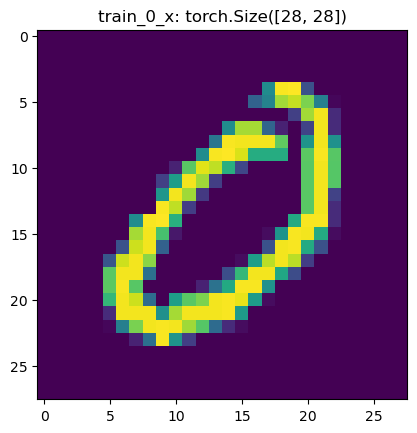

In [6]:
seed() # ÏãúÎìú Í≥†Ï†ï
train_0_x, train_0_y = train_data[1] # xÍ∞Ä ÏÇ¨ÏßÑ, yÎäî ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞
print('Content of Y (Label, type = {}) = {}'.format(type(train_0_y), train_0_y))
print('Shape of X(Data, type = {} = {})'.format(type(train_0_x), train_0_x.shape))

import matplotlib.pyplot as plt
plt.figure(1)
plt.imshow(train_0_x.squeeze())
plt.title('train_0_x: {}'.format(train_0_x.squeeze().shape))
plt.show()

In [7]:
seed() # ÏãúÎìú Í≥†Ï†ï
# Train / Validation / Test ÏÖãÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞ Î°úÎçî ÎßåÎì§Í∏∞
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, pin_memory=True, drop_last=True)
valid_loader = DataLoader(valid_data, batch_size=len(valid_data), pin_memory=True)
test_loader = DataLoader(test_data, batch_size=len(test_data), pin_memory=True)

# Train Î∂ÄÎ∂ÑÏùò Îç∞Ïù¥ÌÑ∞ Î°úÎçîÎ•º ÌôïÏù∏ Ìï¥Î≥¥Í∏∞
train_enumerator = enumerate(train_loader) # train_loaderÏùò Í∞íÍ≥º ÏàúÏÑúÎ•º Ï∂îÏ∂ú

In [8]:
seed() # ÏãúÎìú Í≥†Ï†ï
ex_batch_idx, (ex_data, ex_label) = next(train_enumerator)

print('ÏàúÏÑú: / XÎ™®Ïñë: {} / YÎ™®Ïñë: {}'.format(ex_batch_idx, ex_data.shape, ex_label.shape))
print('Y 0 ~ {} Ï∂úÎ†•: {}'.format(batch_size, ex_label))

ÏàúÏÑú: / XÎ™®Ïñë: 0 / YÎ™®Ïñë: torch.Size([128, 1, 28, 28])
Y 0 ~ 128 Ï∂úÎ†•: tensor([5, 9, 7, 4, 5, 5, 7, 0, 6, 0, 7, 9, 3, 0, 8, 2, 5, 5, 0, 9, 3, 9, 7, 9,
        2, 1, 1, 8, 3, 3, 6, 5, 8, 6, 0, 9, 4, 8, 4, 6, 5, 3, 6, 2, 0, 7, 0, 7,
        7, 6, 9, 7, 8, 9, 5, 4, 0, 3, 0, 0, 6, 1, 1, 7, 4, 1, 9, 9, 0, 8, 6, 8,
        0, 1, 5, 9, 0, 9, 9, 7, 2, 0, 7, 2, 2, 5, 8, 9, 2, 7, 4, 3, 9, 5, 5, 3,
        1, 2, 1, 4, 1, 5, 6, 1, 9, 8, 8, 7, 1, 1, 4, 2, 8, 7, 9, 5, 1, 8, 7, 7,
        0, 0, 7, 3, 2, 7, 0, 2])


## 2.1.4 Î™®Îç∏ ÏÑ†Ïñ∏ - CNN
### Batch Normalization (X)
### Drop Out (X)
### Best Model Save (X)

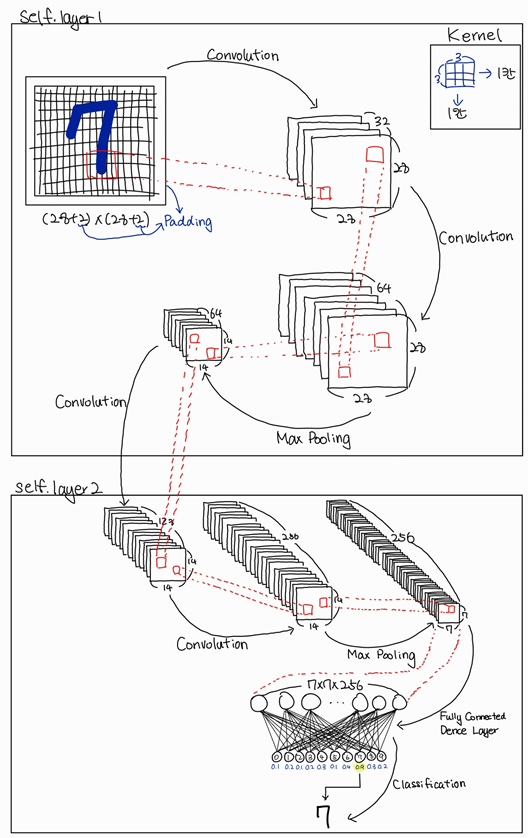

### Î™®Îç∏ ÏÑ†Ïñ∏

In [9]:
import torch.nn as nn
class CNN_model(nn.Module):
    def __init__(self):
        super(CNN_model, self).__init__()
        
        # ÏΩîÎî©ÌÉÄÏûÑ - 3Î∂Ñ
        
        # 1Î≤à Î†àÏù¥Ïñ¥ ÏÉùÏÑ±
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1), # paddingÏúºÎ°ú Ïù∏Ìï¥ ÏÇ¨Ïù¥Ï¶à Î≥¥Ï°¥
            nn.ReLU(), # ReLUÌï®ÏàòÏóê ÌÜµÍ≥ºÏãúÌÇ®Îã§.
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1), # paddingÏúºÎ°ú Ïù∏Ìï¥ ÏÇ¨Ïù¥Ï¶à Î≥¥Ï°¥
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2)) # Ïª§ÎÑê ÏÇ¨Ïù¥Ï¶à 2, stride 2Î°ú ÌÜµÍ≥ºÏãúÌÇ¥ÏúºÎ°úÏÑú ÏÇ¨ÏßÑ ÌÅ¨Í∏∞Í∞Ä 1/2Î°ú Ï§ÑÏñ¥Îì¨
        
        # 2Î≤à Î†àÏù¥Ïñ¥ ÏÉùÏÑ±
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        
        #ÎßàÏßÄÎßâ 0 ~ 9 classificationÏùÑ ÏúÑÌïú fully connected layer ÏÉùÏÑ±
        self.fc1 = nn.Linear(7 * 7 * 256, 10) # 2Î≤àÏùò Îß•Ïä§ÌíÄÎßÅÏùÑ Í±∞Ï≥êÏÑú 28 -> 14 -> 7Ïù¥ ÎêòÏóàÍ≥† Ï±ÑÎÑêÏù¥ 256Í∞ú
        nn.init.xavier_uniform_(self.fc1.weight) # Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî
        
        ##########


   #Î™®Îç∏ ÏÑ§Í≥Ñ ÌõÑ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ layerÎì§ÏùÑ ÌÜµÍ≥ºÌï† Ïàò ÏûàÍ≤å Ìï®.
    def forward(self, x):
           
        conv_out = self.layer1(x)
        out = self.layer2(conv_out)
        out = out.view(out.size(0), -1) # 3Ï∞®Ïõê -> 1Ï∞®Ïõê Flatten
        out = self.fc1(out)

        return out, conv_out

# Model structure check
from torchsummary import summary as Summary
Summary(CNN_model().to(device),(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
            Conv2d-3           [-1, 64, 28, 28]          18,496
              ReLU-4           [-1, 64, 28, 28]               0
         MaxPool2d-5           [-1, 64, 14, 14]               0
            Conv2d-6          [-1, 128, 14, 14]          73,856
              ReLU-7          [-1, 128, 14, 14]               0
            Conv2d-8          [-1, 256, 14, 14]         295,168
              ReLU-9          [-1, 256, 14, 14]               0
        MaxPool2d-10            [-1, 256, 7, 7]               0
           Linear-11                   [-1, 10]         125,450
Total params: 513,290
Trainable params: 513,290
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

## ÌïôÏäµÏóê ÏÇ¨Ïö©ÎêòÎäî Ìï®Ïàò
 - Ï¥àÍ∏∞Ìôî
 - Î™®Îç∏ Íµ¨Îèô
 - ÌïôÏäµ Ï∂îÏù¥

### Ï¥àÍ∏∞Ìôî

In [10]:
# Î™®Îç∏ Ï¥àÍ∏∞Ìôî
from torch.optim import Adam
def init_model():
    plt.rc('font', size = 10)
    global net, loss_fn, optim
    net = CNN_model().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optim = Adam(net.parameters(), lr=learning_rate)
    
# epoch Ïπ¥Ïö¥ÌÑ∞ Ï¥àÍ∏∞Ìôî
def init_epoch():
    global epoch_cnt
    epoch_cnt = 0
    
def init_log():
    plt.rc('font', size = 10)
    # Î™®Îì† LogÎ•º Ï¥àÍ∏∞Ìôî
    global log_stack, iter_log, tloss_log, tacc_log, vloss_log, vacc_log, time_log
    iter_log, tloss_log, tacc_log, vloss_log, vacc_log = [], [], [], [], []
    time_log, log_stack = [], []

### Î™®Îç∏ Íµ¨Îèô

In [11]:
import gc
from torch.cuda import memory_allocated, empty_cache
def clear_memory():
    if device != 'cpu':
        empty_cache()
    gc.collect()
    
# ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶ò
import numpy as np
def epoch(data_loader, mode = 'train'):
    global epoch_cnt
    
    # ÏÇ¨Ïö©ÎêòÎäî Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
    iter_loss, iter_acc, last_grad_performed, last_out, last_label = [], [], False, None, None
    
    # 1 iteration ÌïôÏäµ ÏïåÍ≥†Î¶¨Ï¶ò(forÎ¨∏ÏùÑ ÎÇòÏò§Î©¥ 1 epoch ÏôÑÎ£å)
    for _data, _label in data_loader:
        data, label = _data.to(device), _label.to(device)
        
        
        # ÏΩîÎî©ÌÉÄÏûÑ - 1Î∂Ñ
        
        # 1. Feed-forward
        if mode == 'train':
            net.train()
        else:
            # ÌïôÏäµÎïåÎßå Ïì∞Ïù¥Îäî Dropout, Batch MormalizationÏùÑ ÎØ∏ÏÇ¨Ïö©
            net.eval()
            
        ##########

        result, _ = net(data) # 1 BatchÏóê ÎåÄÌïú Í≤∞Í≥ºÍ∞Ä Î™®Îì† ClassÏóê ÎåÄÌïú ÌôïÎ•†Í∞íÏúºÎ°ú
        _, out = torch.max(result, 1) # resultÏóêÏÑú ÏµúÎåÄ ÌôïÎ•†Í∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏòàÏ∏° class ÎèÑÏ∂ú
        
        # 2. Loss Í≥ÑÏÇ∞
        loss = loss_fn(result, label) # GT ÏôÄ Label ÎπÑÍµêÌïòÏó¨ Loss ÏÇ∞Ï†ï
        iter_loss.append(loss.item()) # ÌïôÏäµ Ï∂îÏù¥Î•º ÏúÑÌïòÏó¨ LossÎ•º Í∏∞Î°ù
        
        # 3. Ïó≠Ï†ÑÌåå ÌïôÏäµ ÌõÑ Gradient Descent
        if mode == 'train':
            optim.zero_grad() # ÎØ∏Î∂ÑÏùÑ ÌÜµÌï¥ ÏñªÏùÄ Í∏∞Ïö∏Í∏∞Î•¥ Ï¥àÍ∏∞Ìôî for Îã§Ïùå epoch
            loss.backward() # Ïó≠Ï†ÑÌåå ÌïôÏäµ
            optim.step() # Gradient Descent ÏàòÌñâ
            last_grad_performed = True # forÎ¨∏ ÎÇòÍ∞ÄÎ©¥ epoch Ïπ¥Ïö¥ÌÑ∞ += 1
            
        # 4. Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
        acc_partial = (out == label).float().sum() # GT == Label Ïù∏ Í∞úÏàò
        acc_partial = acc_partial / len(label) # ( TP / (TP + TN)) Ìï¥ÏÑú Ï†ïÌôïÎèÑ ÏÇ∞Ï∂ú
        iter_acc.append(acc_partial.item()) # ÌïôÏäµ Ï∂îÏù¥Î•º ÏúÑÌïòÏó¨ Acc. Í∏∞Î°ù
            
        # 5. Ïª®Ìì®Ï†Ñ Îß§Ìä∏Î¶≠Ïä§ Ï∂úÎ†•ÏùÑ ÏúÑÌï¥ Í∏∞Î°ù
        last_out = out.cpu().detach() # Î™®Îì† Predict Í∏∞Î°ù
        last_label = _label # Î™®Îì† GT Í∏∞Î°ù
        
    # Ïó≠Ï†ÑÌåå ÌïôÏäµ ÌõÑ Epoch Ïπ¥Ïö¥ÌÑ∞ += 1
    if last_grad_performed:
        epoch_cnt += 1
    
    clear_memory()
    
    # lossÏôÄ accÏùò ÌèâÍ∑†Í∞í for ÌïôÏäµÏ∂îÏù¥ Í∑∏ÎûòÌîÑ, Î™®Îì† GTÏôÄ LabelÍ∞í for Ïª®Ìì®Ï†Ñ Îß§Ìä∏Î¶≠Ïä§
    return np.average(iter_loss), np.average(iter_acc), last_out, last_label

def epoch_not_finished():
    # ÏóêÌè≠Ïù¥ ÎÅùÎÇ®ÏùÑ ÏïåÎ¶º
    return epoch_cnt < maximum_epoch

### ÌïôÏäµ Ï∂îÏù¥

In [12]:
def record_train_log(_tloss, _tacc, _time):
    # Train Log Í∏∞Î°ùÏö©
    time_log.append(_time)
    tloss_log.append(_tloss)
    tacc_log.append(_tacc)
    iter_log.append(epoch_cnt)
    
def record_valid_log(_vloss, _vacc):
    # Validation Log Í∏∞Î°ùÏö©
    vloss_log.append(_vloss)
    vacc_log.append(_vacc)

def last(log_list):
    # Î¶¨Ïä§Ìä∏ ÏïàÏùò ÎßàÏßÄÎßâ Ïà´ÏûêÎ•º Î∞òÌôò(print_log Ìï®ÏàòÏóêÏÑú ÏÇ¨Ïö©)
    if len(log_list) > 0:
        return log_list[len(log_list) - 1]
    else:
        return -1

from IPython.display import clear_output
def print_log():
    # ÌïôÏäµ Ï∂îÏù¥ Ï∂úÎ†•
    
    # ÏÜåÏà´Ï†ê 3ÏûêÎ¶¨ ÏàòÍπåÏßÄ Ï°∞Ï†à
    train_loss = round(float(last(tloss_log)), 3)
    train_acc = round(float(last(tacc_log)), 3)
    val_loss = round(float(last(vloss_log)), 3)
    val_acc = round(float(last(vacc_log)), 3)
    time_spent = round(float(last(time_log)), 3)
    
    log_str = 'Epoch: {:3} | T_Loss {:5} | T_acc {:5} | V_Loss {:5} | V_acc. {:5} | \
üïí {:5}'.format(last(iter_log), train_loss, train_acc, val_loss, val_acc, time_spent)
    
    log_stack.append(log_str) # ÌîÑÎ¶∞Ìä∏ Ï§ÄÎπÑ
    
    # ÌïôÏäµ Ï∂îÏù¥ Í∑∏ÎûòÌîÑ Ï∂úÎ†•
    hist_fig, loss_axis = plt.subplots(figsize=(10, 3), dpi=99) # Í∑∏ÎûòÌîÑ ÏÇ¨Ïù¥Ï¶à ÏÑ§Ï†ï
    hist_fig.patch.set_facecolor('white') # Í∑∏ÎûòÌîÑ Î∞∞Í≤ΩÏÉâ ÏÑ§Ï†ï
    
    # Loss Line Íµ¨ÏÑ±
    loss_t_line = plt.plot(iter_log, tloss_log, label='Train Loss', color='red', marker='o')
    loss_v_line = plt.plot(iter_log, vloss_log, label='Valid Loss', color='blue', marker='s')
    loss_axis.set_xlabel('epoch')
    loss_axis.set_ylabel('loss')
    
    # Acc. Line Íµ¨ÏÑ±
    acc_axis = loss_axis.twinx()
    acc_t_line = acc_axis.plot(iter_log, tacc_log, label='Train Acc.', color='red', marker='+')
    acc_v_line = acc_axis.plot(iter_log, vacc_log, label='Valid Acc.', color='blue', marker='x')
    acc_axis.set_ylabel('accuracy')
    
    # Í∑∏ÎûòÌîÑ Ï∂úÎ†•
    hist_lines = loss_t_line + loss_v_line + acc_t_line + acc_v_line # ÏúÑÏóêÏÑú ÏÑ†Ïñ∏Ìïú pltÏ†ïÎ≥¥Îì§ ÌÜµÌï©
    loss_axis.legend(hist_lines, [l.get_label() for l in hist_lines]) # ÏàúÏÑúÎåÄÎ°ú Í∑∏Î†§Ï£ºÍ∏∞
    loss_axis.grid() # Í≤©Ïûê ÏÑ§Ï†ï
    plt.title('Learning history until epoch {}'.format(last(iter_log)))
    plt.draw()
    
    # ÌÖçÏä§Ìä∏ Î°úÍ∑∏ Ï∂úÎ†•
    clear_output(wait=True)
    plt.show()
    for idx in reversed(range(len(log_stack))): # Î∞òÎåÄÎ°ú sort ÏãúÏºúÏÑú Ï∂úÎ†•
        print(log_stack[idx])

### Î™®Îç∏ ÌïôÏäµ

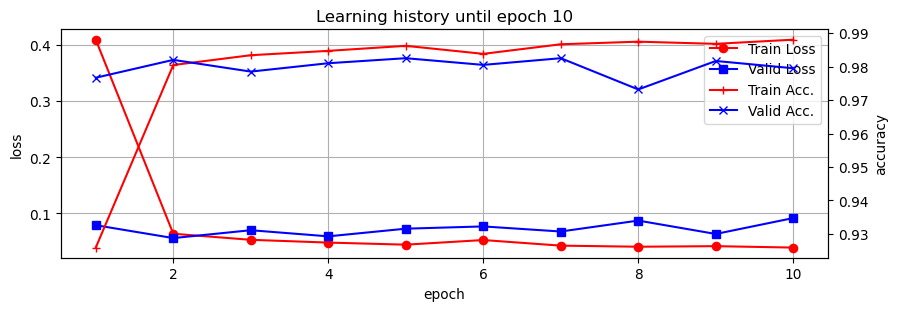

Epoch:  10 | T_Loss 0.039 | T_acc 0.988 | V_Loss 0.092 | V_acc. 0.979 | üïí 120.877
Epoch:   9 | T_Loss 0.042 | T_acc 0.987 | V_Loss 0.063 | V_acc. 0.982 | üïí 120.536
Epoch:   8 | T_Loss 0.041 | T_acc 0.987 | V_Loss 0.087 | V_acc. 0.973 | üïí 121.613
Epoch:   7 | T_Loss 0.043 | T_acc 0.987 | V_Loss 0.068 | V_acc. 0.983 | üïí 120.667
Epoch:   6 | T_Loss 0.053 | T_acc 0.984 | V_Loss 0.077 | V_acc.  0.98 | üïí 406.43
Epoch:   5 | T_Loss 0.044 | T_acc 0.986 | V_Loss 0.073 | V_acc. 0.983 | üïí 120.738
Epoch:   4 | T_Loss 0.048 | T_acc 0.985 | V_Loss 0.059 | V_acc. 0.981 | üïí 121.101
Epoch:   3 | T_Loss 0.053 | T_acc 0.983 | V_Loss  0.07 | V_acc. 0.979 | üïí 122.241
Epoch:   2 | T_Loss 0.064 | T_acc  0.98 | V_Loss 0.056 | V_acc. 0.982 | üïí 119.8
Epoch:   1 | T_Loss 0.409 | T_acc 0.926 | V_Loss 0.079 | V_acc. 0.977 | üïí 116.343

 Training completed!


In [13]:
seed() # ÏãúÎìú Í≥†Ï†ï
# Training Initialization
init_model()
init_epoch()
init_log()

# Training Iteration
import time
while epoch_not_finished():
    start_time = time.time()
    tloss, tacc, _, _ = epoch(train_loader, mode = 'train')
    end_time = time.time()
    time_taken = end_time - start_time
    record_train_log(tloss, tacc, time_taken)
    with torch.no_grad(): # Ïó≠Ï†ÑÌåå ÌïôÏäµÏùÑ ÌïòÏßÄ ÎßêÎèÑÎ°ù(Îçî Ïù¥ÏÉÅ Í≤ΩÏÇ¨Î°ú(gradient)Î•º Ìä∏ÎûòÌÇπÌïòÏßÄ ÏïäÎäîÎã§)
        vloss, vacc, _, _ = epoch(valid_loader, mode = 'val')
        record_valid_log(vloss, vacc)
    print_log()

print('\n Training completed!')

### Í≤∞Í≥º Î∂ÑÏÑù

In [ ]:
# Ï†ïÌôïÎèÑ Í≤ÄÏ¶ù
with torch.no_grad():
    test_loss, test_acc, _, _ = epoch(test_loader, mode = 'test')
    test_acc = round(test_acc, 4)
    test_loss = round(test_loss, 4)
    print('Test Acc.: {}'.format(test_acc))
    print('Test Loss: {}'.format(test_loss))

 - CNN Í∏∞Î≥∏
 - CNN(Dropout, Batch Normalization, Best Model Save) Ï†ÅÏö© ÌõÑ  <---
 - CNN Í≤∞Í≥º Î∂ÑÏÑù(Confustion Matrix)
 - CNN Í≤∞Í≥º Î∂ÑÏÑù(ÌãÄÎ¶∞ Í≤∞Í≥º Î≥¥Í∏∞)
 - Early Stopping
 - ÏûêÏã†Ïùò Î™®Îç∏ ÎßåÎì§Í∏∞

# 2.1.5 Î™®Îç∏ ÏÑ†Ïñ∏ÌõÑ ÌïôÏäµ - CNN
### Batch Normalization (O)
### Drop Out (O)
### Best Model Save (O)

### Î™®Îç∏ ÏÑ†Ïñ∏

In [ ]:
class CNN_model(nn.Module):
    def __init__(self):
        super(CNN_model, self).__init__()
        
        # 1Î≤à Î†àÏù¥Ïñ¥ ÏÉùÏÑ±
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1), # paddingÏúºÎ°ú Ïù∏Ìï¥ ÏÇ¨Ïù¥Ï¶à Î≥¥Ï°¥
            nn.BatchNorm2d(32), #Batch NormalizationÏùÑ ÏàòÌñâ
            nn.ReLU(), # ReLUÌï®ÏàòÏóê ÌÜµÍ≥ºÏãúÌÇ®Îã§.
            nn.Dropout(0.3), # Drop Out ÏàòÌñâ            
            nn.MaxPool2d(kernel_size = 2, stride = 2), # Ïª§ÎÑê ÏÇ¨Ïù¥Ï¶à 2, stride 2Î°ú ÌÜµÍ≥ºÏãúÌÇ¥ÏúºÎ°úÏÑú ÏÇ¨ÏßÑ ÌÅ¨Í∏∞Í∞Ä 1/2Î°ú Ï§ÑÏñ¥Îì¨
        )
        
        # 2Î≤à Î†àÏù¥Ïñ¥ ÏÉùÏÑ±
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        
        #ÎßàÏßÄÎßâ 0 ~ 9 classificationÏùÑ ÏúÑÌïú fully connected layer ÏÉùÏÑ±
        self.fc1 = nn.Linear(7 * 7 * 64, 10, bias = True) # 2Î≤àÏùò Îß•Ïä§ÌíÄÎßÅÏùÑ Í±∞Ï≥êÏÑú 28 -> 14 -> 7Ïù¥ ÎêòÏóàÍ≥† Ï±ÑÎÑêÏù¥ 64Í∞ú
        
        #Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî
        nn.init.xavier_uniform_(self.fc1.weight)

   #Î™®Îç∏ ÏÑ§Í≥Ñ ÌõÑ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ layerÎì§ÏùÑ ÌÜµÍ≥ºÌï† Ïàò ÏûàÍ≤å Ìï®.
    def forward(self, x):
        conv_out = self.layer1(x)
        out = self.layer2(conv_out)
        out = out.view(out.size(0), -1) # 3Ï∞®Ïõê -> 1Ï∞®Ïõê Flatten
        out = self.fc1(out)
        return out, conv_out

# Model structure check
Summary(CNN_model().to(device),(1, 28, 28))

### Î™®Îç∏ ÌïôÏäµ

In [ ]:
seed() # ÏãúÎìú Í≥†Ï†ï
# Training Initialization
init_model()
init_epoch()
init_log()

best_test_acc, best_epoch = 0, 0
# Training Iteration
while epoch_not_finished():
    start_time = time.time()
    tloss, tacc, _, _ = epoch(train_loader, mode = 'train')
    end_time = time.time()
    time_taken = end_time - start_time
    record_train_log(tloss, tacc, time_taken)
    with torch.no_grad():
        vloss, vacc, _, _ = epoch(valid_loader, mode = 'val')
        record_valid_log(vloss, vacc)
    print_log()
    
    with torch.no_grad():
        net.eval()
        _, test_acc, _, _ = epoch(test_loader, mode = 'test')
        
        # Test Ï†êÏàòÍ∞Ä Í∞ÄÏû• Ï¢ãÏïòÎçò Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌïúÎã§
        if best_test_acc < test_acc:
            best_test_acc = test_acc
            best_epoch = epoch_cnt
            print('Epoch: {} / Test Acc: {} | ÏµúÍ≥† Ï†êÏàòÍ∞Ä Í∞±Ïã†ÎêòÏóàÏäµÎãàÎã§. Î™®Îç∏ Ï§ëÍ∞Ñ Ï†ÄÏû•ÏùÑ ÏãúÌñâÌï©ÎãàÎã§.\
            '.format(best_epoch, round(best_test_acc, 5)))
            torch.save(net.state_dict(), './model.pth')

print('\n Training completed!')


# Ï†ïÌôïÎèÑ Í≤ÄÏ¶ù
with torch.no_grad():
    test_loss, test_acc, _, _ = epoch(test_loader, mode = 'test')
    test_acc = round(test_acc, 4)
    test_loss = round(test_loss, 4)
    print('Test Acc.: {}'.format(test_acc))
    print('Test Loss: {}'.format(test_loss))
    
print('Ï†ÄÏû•Îêú Best Model: Epoch: {}/ Test Accuracy: {}'.format(best_epoch, round(best_test_acc, 3)))

### Ï§ëÍ∞Ñ Ï†ÄÏû• Í∏∞Î≤ïÏúºÎ°ú Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄÏÑú Test Acc.Î•º Ï∏°Ï†ï

In [ ]:
net = CNN_model().to(device)
net.load_state_dict(torch.load('./model.pth'))

# Ï†ïÌôïÎèÑ Í≤ÄÏ¶ù
with torch.no_grad():
    test_loss, test_acc, test_out, test_label = epoch(test_loader, mode = 'test')
    test_acc = round(test_acc, 4)
    test_loss = round(test_loss, 4)
    print('Test Acc.: {}'.format(test_acc))
    print('Test Loss: {}'.format(test_loss))

 - CNN Í∏∞Î≥∏
 - CNN(Dropout, Batch Normalization, Best Model Save) Ï†ÅÏö© ÌõÑ
 - CNN Í≤∞Í≥º Î∂ÑÏÑù(Confustion Matrix)   <---
 - CNN Í≤∞Í≥º Î∂ÑÏÑù(ÌãÄÎ¶∞ Í≤∞Í≥º Î≥¥Í∏∞)
 - Early Stopping
 - ÏûêÏã†Ïùò Î™®Îç∏ ÎßåÎì§Í∏∞

### Confustion MatrixÎ•º ÌÜµÌïú Í≤∞Í≥º Í∞ÄÏãúÌôî

In [ ]:
import seaborn as sns # ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨
from sklearn.metrics import confusion_matrix


# ÏΩîÎî© ÌÉÄÏûÑ - 3Î∂Ñ



##########

- Î™®Îç∏Ïù¥ Ïò§ Î∂ÑÎ•òÌïòÎäî ÏºÄÏù¥Ïä§Ïóê ÎåÄÌï¥ÏÑú Î∂ÑÏÑùÌï¥Î≥¥Ïûê

 
- Í∑∏Î¶¨Í≥† Ï†ïÎãµÎ•†Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ Ïà´ÏûêÎäî 1Ïù¥Îã§. 1Ïù¥ Í∞ÄÏû• ÏâΩÍ≤å ÏÉùÍ∏¥ Ïà´ÏûêÎùºÏÑú ÏùºÍπå?

 
- Ïù¥ÏôÄ Í∞ôÏù¥ Î™®Îç∏Ïù¥ ÌäπÏ†ï Ïà´ÏûêÏóêÏÑú Ïôú Ïò§ Î∂ÑÎ•òÏú®Ïù¥ ÎÜíÏùÄÏßÄÎ•º ÏÉùÍ∞ÅÌï¥Î≥¥Í≥†, Ïñ¥Îñ§ ÌäπÏÑ±ÏùÑ Í∞ÄÏ°åÏùÑ Îïå Î∂ÑÎ•òÌïòÍ∏∞Ïóê Ïú†Î¶¨ÌïòÍ≥† Î∂àÎ¶¨ÌïúÏßÄÎ•º ÏÉùÍ∞ÅÌï¥Î≥¥Ïûê. ÎòêÌïú Ïù¥ Î¨∏Ï†úÎ•º Ïñ¥ÎñªÍ≤å Ìï¥Í≤∞Ìï¥ Î≥º Ïàò ÏûàÏùÑÍπå Í≥†ÎØºÌïòÎäî ÏãúÍ∞ÑÏùÑ Í∞ÄÏ†∏Î≥¥Ïûê

 - CNN Í∏∞Î≥∏
 - CNN(Dropout, Batch Normalization, Best Model Save) Ï†ÅÏö© ÌõÑ
 - CNN Í≤∞Í≥º Î∂ÑÏÑù(Confustion Matrix)
 - CNN Í≤∞Í≥º Î∂ÑÏÑù(ÌãÄÎ¶∞ Í≤∞Í≥º Î≥¥Í∏∞)   <---
 - Early Stopping
 - ÏûêÏã†Ïùò Î™®Îç∏ ÎßåÎì§Í∏∞

# 2.1.6 ÌãÄÎ¶∞ Í≤∞Í≥º Î∂ÑÏÑù
 - Î™®Îç∏Ïù¥ MNISTÏóêÏÑú ÏûòÎ™ª Î∂ÑÎ•òÌïú Í≤ΩÏö∞Î•º ÏÉòÌîåÎßÅÌïúÎã§
 - ÏÉòÌîåÎßÅ Í≤∞Í≥ºÎ•º Î≥¥Í≥† Ïù¥Ïú†Î•º Î∂ÑÏÑùÌï¥Î≥∏Îã§
 - Î∂ÑÏÑùÌïú Ïù¥Ïú†Î•º ÌÜ†ÎåÄÎ°ú Î™®Îç∏Ïùò Í∞úÏÑ†Ï†êÏùÑ Ï∞æÎäîÎã§

In [ ]:
def test(wrong_loader, show_goal_cnt):
    
    # ÎßåÏïΩ 4Î°ú ÎÇòÎàÑÏñ¥ Îñ®Ïñ¥ÏßÄÏßÄ ÏïäÏùÑ Í≤ΩÏö∞ Ïπ¥Ïö¥ÌÑ∞ Î≥¥Ï†ï
    while True:
        if show_goal_cnt % 4 == 0:
            break
        show_goal_cnt += 1
    
    # ÏÇ¨Ïö©ÎêòÎäî Î≥ÄÏàòÎì§ Ï¥àÍ∏∞Ìôî
    plt_pic_list, gt_label_list = [], [] # plt showÏóê ÏÇ¨Ïö©Ìï† Î¶¨Ïä§Ìä∏
    pred_label_list, second_pred_label_list, third_pred_label_list = [], [], [] # plt showÏóê ÏÇ¨Ïö©Ìï† Î¶¨Ïä§Ìä∏(1, 2, 3Îì± ÎùºÎ≤®)
    plt_cnt, cnt, show_cnt = 0, 0, 0 # plt showÏóêÏÑú ÌïÑÏöîÌïú Ïπ¥Ïö¥ÌÑ∞
    
    for _data, _label in wrong_loader: # Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÇ¨ÏßÑÍ≥º ÎùºÎ≤®ÏùÑ Î∂ÑÎ¶¨
        
        # ÏΩîÎî©ÌÉÄÏûÑ(Îç∞Ïù¥ÌÑ∞Î•º Î™®Îç∏Ïóê ÎÑ£Í≥† ÏòàÏ∏° Í≤∞Í≥º 1, 2, 3ÏàúÏúÑ Ï∂úÎ†•) - 3Î∂Ñ
        

            
        ##########
            
            # Ï†ïÎãµÍ≥º ÏòàÏ∏° Í≤∞Í≥ºÍ∞Ä Îã§Î•∏ Í≤ΩÏö∞(Î™®Îç∏Ïù¥ ÏûòÎ™ª Î∂ÑÎ•òÌïú Í≤ΩÏö∞)
            if gt_label != pred_label:
                # pltÎ°ú 4Í∞úÎ•º ÌïúÎ≤àÏóê Ï∂úÎ†•ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê 4Î≤àÎèôÏïà Î¶¨Ïä§Ìä∏Ïóê ÎàÑÏ†ÅÏãúÌÇ®Îã§
                show_cnt += 1
                wrong_pic, _ = test_data[cnt]
                plt_pic_list.append(wrong_pic)
                gt_label_list.append(gt_label)
                pred_label_list.append(pred_label)
                second_pred_label_list.append(second_label)
                third_pred_label_list.append(third_label)
                plt_cnt += 1
                
                # 4Î≤à ÎàÑÏ†ÅÏù¥ ÏôÑÎ£åÎêòÎ©¥, ÎàÑÏ†ÅÎêú Í∞íÎì§ÏùÑ pltÎ°ú ÏÇ¨ÏßÑÍ≥º Ìï®Íªò Ï∂úÎ†•ÌïúÎã§
                if plt_cnt == 4: # ÎßåÏïΩ Ïπ¥Ïö¥ÌÑ∞Í∞Ä 4Í∞Ä ÎêòÎ©¥
                    plt.figure(figsize = (40, 10)) # pltÏùò Í∞ÄÎ°ú ÏÑ∏Î°ú ÏÇ¨Ïù¥Ï¶àÎ•º Ï†ïÌïòÍ≥†
                    plt.rc('font', size = 23) # Ìè∞Ìä∏ ÌÅ¨Í∏∞Î•º Ï†ïÌïúÎã§
                    plt.subplot(141) # 1: Ìñâ, 4: Ïó¥, 1: 1Î≤àÏß∏ Ïπ∏Ïóê Îì§Ïñ¥Í∞à Ï†ïÎ≥¥
                    plt.imshow(plt_pic_list[0].squeeze()) # ÏÇ¨ÏßÑÏùÑ Ï∂úÎ†•
                    plt.title('\n\nGround Truth: {} | Wrong Predict: {}\n2nd Predict: {} | 3rd Predict: {}'.format
                              (gt_label_list[0], pred_label_list[0], 
                               second_pred_label_list[0], third_pred_label_list[0]))
                    
                    plt.subplot(142) # 1: Ìñâ, 4: Ïó¥, 2: 2Î≤àÏß∏ Ïπ∏Ïóê Îì§Ïñ¥Í∞à Ï†ïÎ≥¥
                    plt.imshow(plt_pic_list[1].squeeze()) # ÏÇ¨ÏßÑÏùÑ Ï∂úÎ†•
                    plt.title('\n\nGround Truth: {} | Wrong Predict: {}\n2nd Predict: {} | 3rd Predict: {}'.format
                              (gt_label_list[1], pred_label_list[1], 
                               second_pred_label_list[1], third_pred_label_list[1]))
                    
                    plt.subplot(143) # 1: Ìñâ, 4: Ïó¥, 3: 3Î≤àÏß∏ Ïπ∏Ïóê Îì§Ïñ¥Í∞à Ï†ïÎ≥¥
                    plt.imshow(plt_pic_list[2].squeeze()) # ÏÇ¨ÏßÑÏùÑ Ï∂úÎ†•
                    plt.title('\n\nGround Truth: {} | Wrong Predict: {}\n2nd Predict: {} | 3rd Predict: {}'.format
                              (gt_label_list[2], pred_label_list[2], 
                               second_pred_label_list[2], third_pred_label_list[2]))
                    
                    plt.subplot(144) # 1: Ìñâ, 4: Ïó¥, 4: 4Î≤àÏß∏ Ïπ∏Ïóê Îì§Ïñ¥Í∞à Ï†ïÎ≥¥
                    plt.imshow(plt_pic_list[3].squeeze()) # ÏÇ¨ÏßÑÏùÑ Ï∂úÎ†•
                    plt.title('\n\nGround Truth: {} | Wrong Predict: {}\n2nd Predict: {} | 3rd Predict: {}'.format
                              (gt_label_list[3], pred_label_list[3], 
                               second_pred_label_list[3], third_pred_label_list[3]))
                    plt.show()
                    
                    # Îã§Ïãú Ïπ¥Ïö¥ÌÑ∞ 4Î•º ÏåìÍ≥† Ï∂ùÎ†•ÏùÑ Î∞òÎ≥µÌïòÍ∏∞ ÏúÑÌïòÏó¨ ÌïÑÏöîÌïú Î≥ÄÏàòÎì§ÏùÑ Î™®Îëê Ï¥àÍ∏∞Ìôî ÌïúÎã§
                    plt_cnt, plt_pic_list, gt_label_list = 0, [], []
                    pred_label_list, second_pred_label_list, third_pred_label_list = [], [], []
                
            cnt += 1
            
            # Ï∂úÎ†•ÌïòÍ≥† Ïã∂ÏùÄ Í∞úÏàòÍ∞Ä Ï∂©Ï°±ÎêòÎ©¥ forÎ¨∏ÏùÑ Ï§ëÍ∞ÑÏóê Îπ†Ï†∏ÎÇòÏò®Îã§
            if show_cnt == show_goal_cnt:
                break
        
        # Ï∂úÎ†•ÌïòÍ≥† Ïã∂ÏùÄ Í∞úÏàòÍ∞Ä Ï∂©Ï°±ÎêòÎ©¥ forÎ¨∏ÏùÑ Ï§ëÍ∞ÑÏóê Îπ†Ï†∏ÎÇòÏò®Îã§
        if show_cnt == show_goal_cnt:
            break

# ÏΩîÎî©ÌÉÄÏûÑ(testÏö© Îç∞Ïù¥ÌÑ∞ Î°úÎçîÎ•º ÎßåÎì§Í≥†, Ìï®ÏàòÎ•º run)

wrong_loader = DataLoader(test_data, pin_memory=True) # batch size ÏóÜÏù¥ ÌÜµÏ±ÑÎ°ú Îç∞Ïù¥ÌÑ∞ Î°úÎçîÏóê testÎç∞Ïù¥ÌÑ∞ ÏÇΩÏûÖ
test(wrong_loader, 12)

##########

- Í∞Å Ïà´ÏûêÏùò Ground TruthÏôÄ ÌãÄÎ¶∞ Í≤ΩÏö∞Î•º 12Í∞úÎßå Ï∂úÎ†•Ìï¥ Î≥¥ÏïòÎã§
- ÌãÄÎ¶∞Í≤ΩÏö∞Ïùò 2Î≤àÏß∏Î°ú ÏòàÏ∏°Ìïú Ïà´ÏûêÏôÄ, 3Î≤àÏß∏Î°ú ÏòàÏ∏°Ìïú Ïà´ÏûêÎ•º Í∞ôÏù¥ Î≥º Ïàò ÏûàÎã§
- 2 ~ 3Î≤àÏß∏ ÏòàÏ∏° Í≤∞Í≥º ÏïàÏóê Ï†ïÎãµÏù¥ ÏûàÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏßÄÎßå, ÏóÜÎäî Í≤ΩÏö∞ÎèÑ ÏûàÎã§
- Ïù¥ Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú ÌòÑÏû¨ Î™®Îç∏Ïùò Îã®Ï†êÍ≥º, Í∞úÏÑ† Î∞©ÏïàÏùÑ ÏÉùÍ∞ÅÌï¥ Î≥∏Îã§

 - CNN Í∏∞Î≥∏
 - CNN(Dropout, Batch Normalization, Best Model Save) Ï†ÅÏö© ÌõÑ
 - CNN Í≤∞Í≥º Î∂ÑÏÑù(Confustion Matrix)
 - CNN Í≤∞Í≥º Î∂ÑÏÑù(ÌãÄÎ¶∞ Í≤∞Í≥º Î≥¥Í∏∞)
 - Early Stopping   <---
 - ÏûêÏã†Ïùò Î™®Îç∏ ÎßåÎì§Í∏∞

# 2.1.7 Early Stopping
 - Train, Validation Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÏùÑ Í≥ºÎèÑÌïòÍ≤å ÏãúÌÇ§Î©¥ Validation ÎßåÏùÑ ÏúÑÌï¥ ÌïôÏäµÏù¥ Ïù¥Î£®Ïñ¥Ï†∏ÏÑú Over fittingÏù¥ ÏùºÏñ¥ÎÇúÎã§
 - Ïù¥Î•º Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌïòÏó¨, ÌïôÏäµÎ•†Ïù¥ Îçî Ïù¥ÏÉÅ ÏÉÅÏäπÌïòÏßÄ ÏïäÍ≤å ÎêòÎ©¥ ÌïôÏäµÏùÑ Î©àÏ∂ú Ïàò ÏûàÎã§
 - Îß§ epochÎßàÎã§ Ï§ÑÏñ¥ÎìúÎäî validation lossÎ•º Î™®ÎãàÌÑ∞ÎßÅÌïòÏó¨ ÏùºÏ†ï patience Ïù¥ÏÉÅ ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ ÏóÜÏúºÎ©¥ ÌïôÏäµÏùÑ Ï°∞Í∏∞ Ï¢ÖÎ£åÌïúÎã§

### Early StoppingÏùÑ ÏúÑÌïú Í∞ÄÎ≤ºÏö¥ cnnÎ™®Îç∏ Ï†úÏûë
 - Early StoppingÏùÑ Î≥∏ Î™®Îç∏Ïóê Ï†úÎåÄÎ°ú Ï†ÅÏö©ÌïòÎ©¥ Î™®Îç∏Ïù¥ ÌïôÏäµÏùÑ Ïò§Îûò ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶∞Îã§
 - Early StoppingÏù¥ ÏûëÎèôÌïòÎäî Î™®ÏäµÏùÑ Îπ†Î•¥Í≤å ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌïòÏó¨ ÌïôÏäµÏù¥ Îπ†Î•∏ Í∞ÄÎ≤ºÏö¥ Î™®Îç∏ÏùÑ ÏûÑÏãúÎ°ú ÎßåÎì†Îã§(ÏÑ±Îä• ÏïàÏ¢ãÏùÄ Î™®Îç∏)

### ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï

In [ ]:
# Learning
maximum_epoch = 9999 # Early StoppingÏù¥ ÎèôÏûëÌï† Í≤ÉÏùÑ Í∞êÏïàÌïòÏó¨ Îß§Ïö∞ ÎÜíÍ≤å ÏÑ§Ï†ï
learning_rate = 0.01 # Early StoppingÏù¥ Îπ®Î¶¨ ÎèôÏûëÌï† Ïàò ÏûàÎèÑÎ°ù Learning RateÎ•º ÎÜíÍ≤å ÏÑ§Ï†ï
patience = 10 # nÎ≤à Ïó∞ÏÜçÏúºÎ°ú Validation LossÍ∞Ä Í∞úÏÑ†Ïù¥ ÏïàÎêòÎ©¥ ÌïôÏäµÏùÑ Ï§ëÏßÄÌïúÎã§

### Îπ†Î•∏ Early Stopping ÌÖåÏä§Ìä∏Î•º ÏúÑÌïòÏó¨ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï§ÑÏù¥Í∏∞

In [ ]:
seed() # ÏãúÎìú Í≥†Ï†ï
mnist_transform = transforms.Compose([ToTensor(),
                                      Normalize(mean=(0.5,), std=(0.5,))
])

train_data_es = datasets.MNIST(root = './', train = True, download = True, transform = mnist_transform)
train_data_es, valid_data_es, _ = random_split(train_data_es, [500, 200, 59300])
test_data_es = datasets.MNIST(root = './', train = False, download = True, transform = mnist_transform)

In [ ]:
seed() # ÏãúÎìú Í≥†Ï†ï
# Create data loader
train_loader_es = DataLoader(train_data_es, batch_size=batch_size, shuffle=True, pin_memory=True, drop_last=True)
valid_loader_es = DataLoader(valid_data_es, batch_size=batch_size, pin_memory=True)
test_loader_es = DataLoader(test_data_es, batch_size=batch_size, pin_memory=True)

### Îπ†Î•∏ Early Stopping ÌÖåÏä§Ìä∏Î•º ÏúÑÌïòÏó¨ Í∞ÄÎ≤ºÏö¥ Î™®Îç∏ ÏÑ§Í≥Ñ

In [ ]:
def init_model():
    global net, loss_fn, optim
    net = CNN_model().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optim = Adam(net.parameters(), lr=learning_rate)
    
class CNN_model(nn.Module):
    def __init__(self):
        super(CNN_model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
        )
        self.fc1 = nn.Linear(14 * 14 * 8, 10, bias = True)
        nn.init.xavier_uniform_(self.fc1.weight)
    def forward(self, x):
        conv_out = self.layer1(x)
        out = conv_out.view(conv_out.size(0), -1)
        out = self.fc1(out)
        return out, conv_out

Summary(CNN_model().to(device),(1, 28, 28))

### Early StoppingÏóê ÌïÑÏöîÌïú Í∏∞Îä• ÏÑ†Ïñ∏

In [ ]:
class EarlyStopping:
    """Ï£ºÏñ¥ÏßÑ patience Ïù¥ÌõÑÎ°ú validation lossÍ∞Ä Í∞úÏÑ†ÎêòÏßÄ ÏïäÏúºÎ©¥ ÌïôÏäµÏùÑ Ï°∞Í∏∞ Ï§ëÏßÄ"""
    def __init__(self, patience = 10, verbose = False, delta = 0, path = 'checkpoint.pth', save = False):
#         patience (int): validation lossÍ∞Ä Í∞úÏÑ†Îêú ÌõÑ Í∏∞Îã§Î¶¨Îäî Í∏∞Í∞Ñ
#         verbose (bool): TrueÏùº Í≤ΩÏö∞ Í∞Å validation lossÏùò Í∞úÏÑ† ÏÇ¨Ìï≠ Î©îÏÑ∏ÏßÄ Ï∂úÎ†•
#         delta (float): Í∞úÏÑ†ÎêòÏóàÎã§Í≥† Ïù∏Ï†ïÎêòÎäî monitered quantityÏùò ÏµúÏÜå Î≥ÄÌôî
#         path (str): checkpointÏ†ÄÏû• Í≤ΩÎ°ú

        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.save = save

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print('EarlyStopping counter: {} out of {}'.format(self.counter, self.patience))
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        # validation lossÍ∞Ä Í∞êÏÜåÌïòÎ©¥ Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌïúÎã§.
        if self.verbose:
            print('Validation loss decresed ({:5} --> {:5}). Saving Model...'.format(self.val_loss_min, val_loss))
        if self.save == True:
            torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

### Î™®Îç∏ ÌïôÏäµ(Early Stopping Ï†ÅÏö©)
 - Early StoppingÏù¥ Ï†ÅÏö©ÎêòÏóàÍ∏∞ ÎïåÎ¨∏Ïóê ÏÑ§Ï†ïÌï¥ ÎÜìÏùÄ epochÏù¥ Îã§ ÎèåÏïÑÍ∞ÄÏßÄ ÏïäÍ≥†, Ï§ëÍ∞ÑÏóê ÌïôÏäµÏùÑ ÎßàÏπúÎã§
 - Ï§ëÍ∞ÑÏóê ÌïôÏäµÏùÑ ÎßàÏπòÎäî Ïù¥Ïú†Îäî, Î™®Îç∏Ïùò ÌïôÏäµÏóê Îçî Ïù¥ÏÉÅ Î∞úÏ†ÑÏù¥ ÏóÜÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§(Validation LossÍ∞Ä Ï§ÑÏñ¥Îì§ÏßÄ ÏïäÏùå)
 - Î™®Îç∏Ïùò Î∞úÏ†ÑÏù¥ ÏóÜÎã§ÎäîÍ≤ÉÏùÑ ÌåêÎã®ÌïòÎäî Í∏∞Ï§ÄÏùÄ patienceÏù¥Îã§
 - ÎßåÏïΩ patienceÍ∞Ä 10Ïù¥ÎùºÎ©¥, 10Î≤à Ïó∞ÏÜçÏúºÎ°ú Validation LossÍ∞Ä Ï§ÑÏñ¥Îì§ÏßÄ ÏïäÏúºÎ©¥ Over fittingÏù¥ÎùºÍ≥† ÌåêÎã®ÌïòÍ≥† ÌïôÏäµÏùÑ Î©àÏ∂îÍ≤å ÎêúÎã§

In [ ]:
seed() # ÏãúÎìú Í≥†Ï†ï
# Training Initialization
init_model()
init_epoch()
init_log()

# Early Stopping ÏÑ†Ïñ∏
early_stopping = EarlyStopping(10)

# Training Iteration
while epoch_not_finished():
    start_time = time.time()
    tloss, tacc, _, _ = epoch(train_loader_es, mode = 'train')
    end_time = time.time()
    time_taken = end_time - start_time
    record_train_log(tloss, tacc, time_taken)
    with torch.no_grad():
        vloss, vacc, _, _ = epoch(valid_loader_es, mode = 'val')
        record_valid_log(vloss, vacc)
    print_log()
    
    # ÏΩîÌåÖÌÉÄÏûÑ(early stopping Í∏∞Îä•ÏùÑ Î™®Îç∏Ïóê Ï†ÅÏö©)
    

    
    ##########

print('\n Training completed!')
# Ï†ïÌôïÎèÑ Í≤ÄÏ¶ù
with torch.no_grad():
    test_loss, test_acc, _, _ = epoch(test_loader, mode = 'test')
    test_acc = round(test_acc, 4)
    test_loss = round(test_loss, 4)
    print('Test Acc.: {}'.format(test_acc))
    print('Test Loss: {}'.format(test_loss))

- ÌïôÏäµ Ï§ëÍ∞ÑÏóê 10Î≤à Ïó∞ÏÜçÏúºÎ°ú Validation LossÍ∞Ä Ï§ÑÏñ¥Îì§ÏßÄ ÏïäÏïÑÏÑú ÌïôÏäµÏùÑ Ï§ëÏßÄÌñàÎã§
- Early Stopping Í∏∞Îä•ÏùÑ Îπ†Î•¥Í≤å Î≥¥Í∏∞ ÏúÑÌï¥ ÎßåÎì† Î™®Îç∏Ïù¥ÎØÄÎ°ú Ï†ïÌôïÎèÑÎäî Îß§Ïö∞ ÎÇÆÎã§

# ============================================================

 - CNN Í∏∞Î≥∏
 - CNN(Dropout, Batch Normalization, Best Model Save) Ï†ÅÏö© ÌõÑ
 - CNN Í≤∞Í≥º Î∂ÑÏÑù(Confustion Matrix)
 - CNN Í≤∞Í≥º Î∂ÑÏÑù(ÌãÄÎ¶∞ Í≤∞Í≥º Î≥¥Í∏∞)
 - Early Stopping
 - ÏûêÏã†Ïùò Î™®Îç∏ ÎßåÎì§Í∏∞   <---

# 2.2 Pytorch MNIST - Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÏßÅÏ†ë ÎÜíÌòÄÎ≥¥Ïûê
 - CNNÏùò Íµ¨Ï°∞Î•º Î∞îÍæ∏Ïñ¥ ÎÇòÎßåÏùò Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥Î≥¥Ïûê
 - Î™©Ìëú Ï†ïÌôïÎèÑ: 99.5Ï†ê ÎßåÎì§Í∏∞
 - Î∞îÍøÄ Ïàò ÏûàÎäî ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞: Learning Rate, Batch size, Epochs, Optimizer, Activation Function, Î™®Îç∏ Î†àÏù¥Ïñ¥ Íµ¨Ï°∞ Îì±

### Î™®Îç∏ ÏÑ†Ïñ∏(Batch Normalization, Dropout, Early Stopping, Check Point Save Î™®Îëê Ï†ÅÏö©Îêú Î™®Îç∏ ÏòàÏãú)

In [ ]:
maximum_epoch = 30
learning_rate = 0.005

def init_model():
    global net, loss_fn, optim
    net = My_model().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optim = Adam(net.parameters(), lr=learning_rate)
    
class My_model(nn.Module):
    def __init__(self):
        super(My_model, self).__init__()
        # 1Î≤à Î†àÏù¥Ïñ¥ ÏÉùÏÑ±
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1), # paddingÏúºÎ°ú Ïù∏Ìï¥ ÏÇ¨Ïù¥Ï¶à Î≥¥Ï°¥
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
        )
        
        # 2Î≤à Î†àÏù¥Ïñ¥ ÏÉùÏÑ±
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        
        #ÎßàÏßÄÎßâ 0 ~ 9 classificationÏùÑ ÏúÑÌïú fully connected layer ÏÉùÏÑ±
        self.fc1 = nn.Linear(7 * 7 * 64, 10, bias = True) 
        
        #Í∞ÄÏ§ëÏπò Ï¥àÍ∏∞Ìôî
        nn.init.xavier_uniform_(self.fc1.weight)

   #Î™®Îç∏ ÏÑ§Í≥Ñ ÌõÑ Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ layerÎì§ÏùÑ ÌÜµÍ≥ºÌï† Ïàò ÏûàÍ≤å Ìï®.
    def forward(self, x):
        conv_out = self.layer1(x)
        out = self.layer2(conv_out)
        out = out.view(out.size(0), -1) # ÏÑ§Î™Ö 1
        out = self.fc1(out)
        return out, conv_out

# Model structure check
Summary(My_model().to(device),(1, 28, 28))

### Î™®Îç∏ ÌïôÏäµ

In [ ]:
seed() # ÏãúÎìú Í≥†Ï†ï
# Training Initialization
init_model()
init_epoch()
init_log()
early_stopping = EarlyStopping(patience = 30)

best_test_acc, best_epoch = 0, 0
# Training Iteration
while epoch_not_finished():
    start_time = time.time()
    tloss, tacc, _, _ = epoch(train_loader, mode = 'train')
    end_time = time.time()
    time_taken = end_time - start_time
    record_train_log(tloss, tacc, time_taken)
    with torch.no_grad():
        vloss, vacc, _, _ = epoch(valid_loader, mode = 'val')
        record_valid_log(vloss, vacc)
    print_log()
    
    # early_stoppingÎäî validation lossÍ∞Ä Í∞êÏÜåÌïòÏòÄÎäîÏßÄ ÌôïÏù∏
    early_stopping(vloss, net)
    if early_stopping.early_stop:
        print("Early stopping")
        break
    
    with torch.no_grad():
        net.eval()
        _, test_acc, _, _ = epoch(test_loader, mode = 'test')
        
        # Test Ï†êÏàòÍ∞Ä Í∞ÄÏû• Ï¢ãÏïòÎçò Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌïúÎã§
        if best_test_acc < test_acc:
            best_test_acc = test_acc
            best_epoch = epoch_cnt
            print('Epoch: {} / Test Acc: {} | ÏµúÍ≥† Ï†êÏàòÍ∞Ä Í∞±Ïã†ÎêòÏóàÏäµÎãàÎã§. Î™®Îç∏ Ï§ëÍ∞Ñ Ï†ÄÏû•ÏùÑ ÏãúÌñâÌï©ÎãàÎã§.'.format(best_epoch, round(best_test_acc, 5)))
            torch.save(net.state_dict(), './model.pth')

print('\n Training completed!')

# Ï†ïÌôïÎèÑ Í≤ÄÏ¶ù
with torch.no_grad():
    test_loss, test_acc, _, _ = epoch(test_loader, mode = 'test')
    test_acc = round(test_acc, 4)
    test_loss = round(test_loss, 4)
    print('Test Acc.: {}'.format(test_acc))
    print('Test Loss: {}'.format(test_loss))
    
print('Ï†ÄÏû•Îêú Best Model: Epoch: {}/ Test Accuracy: {}'.format(best_epoch, round(best_test_acc, 3)))

### Î™®Îç∏Ïùò Ï†ïÌôïÎèÑ Ï∂úÎ†•

In [ ]:
net = My_model().to(device)
net.load_state_dict(torch.load('./model.pth'))

# Ï†ïÌôïÎèÑ Í≤ÄÏ¶ù
with torch.no_grad():
    test_loss, test_acc, _, _ = epoch(test_loader, mode = 'test')
    test_acc = round(test_acc, 4)
    test_loss = round(test_loss, 4)
    print('Test Acc.: {}'.format(test_acc))
    print('Test Loss: {}'.format(test_loss))